<a href="https://colab.research.google.com/github/Soumo31428/LogisticRegressionImplementation/blob/main/Logistic_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
## create the dataset
x, y = make_classification(n_samples = 1200, n_features = 15, n_classes = 2, random_state = 42)

In [ ]:
pd.DataFrame(x).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.778587,-0.344635,-1.591906,1.295149,-0.938543,-0.077222,1.270529,1.677207,0.644065,-0.636257,-0.838658,0.227063,0.978003,0.404941,-1.933417
1,-0.263161,-0.451641,0.239551,-0.838176,0.592018,1.048204,2.505449,-1.457100,-1.372410,1.895149,0.593539,-0.305632,1.064171,-0.600339,0.842469
2,-1.336725,1.023531,0.150967,-0.218653,0.710316,-0.454548,0.156694,-1.819490,-0.411823,0.175287,-0.080878,0.131928,1.897289,-0.091400,0.943513
3,0.756953,0.909287,0.869194,-1.507499,-0.390778,-0.747103,0.466067,1.498091,-0.133526,0.938571,-0.174711,-0.521956,-0.972451,0.991854,-0.049421
4,-0.282241,-0.938467,0.311762,0.953009,0.590303,-0.357415,-1.210743,-1.414820,1.050774,-0.546408,0.460416,-1.162939,0.237643,-0.299877,0.875984


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
## Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
y_pred = model.predict(xtest)


### In a binary classification if we consider a test data point to be in which side of the line then predict_proba() function gives the probability of situating on which sid of line.

In [ ]:
model.predict_proba( xtest)[:10]

array([[0.10998396, 0.89001604],
       [0.17019817, 0.82980183],
       [0.04250004, 0.95749996],
       [0.10981568, 0.89018432],
       [0.62481335, 0.37518665],
       [0.35083274, 0.64916726],
       [0.88247335, 0.11752665],
       [0.99003805, 0.00996195],
       [0.09072479, 0.90927521],
       [0.1203728 , 0.8796272 ]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(ytest, y_pred)
print(score)
cm = confusion_matrix(ytest, y_pred)
print(cm)
cr = classification_report(ytest, y_pred)
print(cr)

0.8694444444444445
[[166  22]
 [ 25 147]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       188
           1       0.87      0.85      0.86       172

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



## Hyperparameter Tuning and Cross Validation

### GridSearchCV

In [ ]:
log = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 150, 200]

In [ ]:
params = dict(penalty= penalty, C = c_values, solver = solver, max_iter = max_iter)

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [ ]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = log, param_grid = params, scoring = 'accuracy', cv = cv, n_jobs = -1)


In [ ]:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid.best_score_

0.869047619047619

In [ ]:
y_pred_grid = grid.predict(xtest)
score = accuracy_score(ytest, y_pred_grid)
print(score)
cm = confusion_matrix(ytest, y_pred_grid)
print(cm)
cr = classification_report(ytest, y_pred_grid)
print(cr)

0.8666666666666667
[[164  24]
 [ 24 148]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       188
           1       0.86      0.86      0.86       172

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



### RandomizedSearchCV

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
log = LogisticRegression()
random = RandomizedSearchCV(estimator = log, param_distributions= params,cv= 5, scoring = 'accuracy', n_jobs = -1)

In [ ]:
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'max_iter': [100, 150, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
random.best_score_

0.869047619047619

In [ ]:
random.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}

In [ ]:
y_pred_random = random.predict(xtest)
score = accuracy_score(ytest, y_pred_random)
print(score)
cm = confusion_matrix(ytest, y_pred_random)
print(cm)
cr = classification_report(ytest, y_pred_random)
print(cr)

0.8666666666666667
[[164  24]
 [ 24 148]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       188
           1       0.86      0.86      0.86       172

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



## Logistic Regression for Multiclass Classification

In [ ]:
## create the dataset
x,y = make_classification(n_samples = 1500, n_features = 10, n_informative = 3, n_classes = 3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class = 'ovr')
logistic.fit(xtrain, ytrain)


LogisticRegression(multi_class='ovr')

In [ ]:
y_pred_ovr = logistic.predict(xtest)
y_pred_ovr[:20]

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(ytest, y_pred_ovr)
print(score)
cm = confusion_matrix(ytest, y_pred_ovr)
print(cm)
cr = classification_report(ytest, y_pred_ovr)
print(cr)

0.64
[[126   6  17]
 [ 54  50  42]
 [ 23  20 112]]
              precision    recall  f1-score   support

           0       0.62      0.85      0.72       149
           1       0.66      0.34      0.45       146
           2       0.65      0.72      0.69       155

    accuracy                           0.64       450
   macro avg       0.64      0.64      0.62       450
weighted avg       0.64      0.64      0.62       450



## Logistic Regression for Imbalanced Dataset

In [ ]:
## Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
## Imbalanced Dataset
x,y = make_classification(n_samples = 12000, n_features = 2, n_clusters_per_class = 1, n_redundant = 0, weights = [0.99], random_state = 10)

In [ ]:
Counter(y)

Counter({0: 11816, 1: 184})

<Axes: xlabel='0', ylabel='1'>

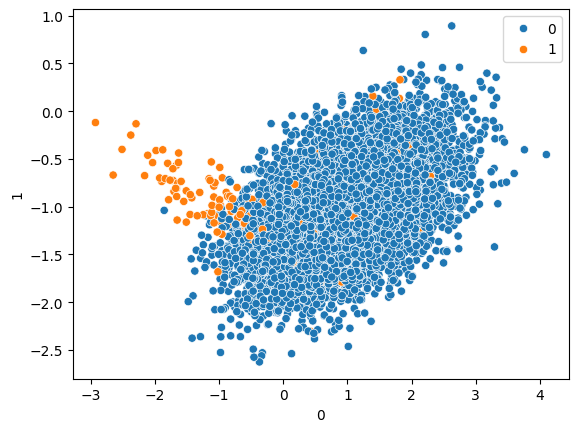

In [ ]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue = y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
## Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
imb = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [ ]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [ ]:
params = dict(penalty= penalty, C = c_values, solver = solver, class_weight = class_weight)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [ ]:
from sklearn.model_selection import GridSearchCV,  StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = imb, param_grid = params, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [ ]:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
y_pred_imb = grid.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(ytest, y_pred_imb)
print(score)
cm = confusion_matrix(ytest, y_pred_imb)
print(cm)
cr = classification_report(ytest, y_pred_imb)
print(cr)

0.9894444444444445
[[3543    6]
 [  32   19]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3549
           1       0.76      0.37      0.50        51

    accuracy                           0.99      3600
   macro avg       0.88      0.69      0.75      3600
weighted avg       0.99      0.99      0.99      3600



## Logistic Regression with ROC curve and ROC AUC score

In [2]:
## roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [3]:
## Generate 2 class dataset
x,y = make_classification(n_samples=1000,n_classes = 2, random_state = 1)

In [4]:
## split the dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [5]:
## Created a dummy model with default 0 as output (majority class)
dummy_model_prob = [0 for _ in range(len(ytest))]
dummy_model_prob[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
## Create a basic logisistic model
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
## Prediction based on probability
model_prob = model.predict_proba(xtest)
model_prob.shape

(250, 2)

In [17]:
## Let's focus on positive outcome
model_prob = model_prob[:,1]

In [18]:
## Let's calculate the scores
dummy_model_auc = roc_auc_score(ytest, dummy_model_prob)
model_auc = roc_auc_score(ytest, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


### False positive Rate:

Formula:  

**FP/N = FP / (FP+TN)**

where, FP = number of false positive

TN = Number of true negatives

N = Total number of negatives

Sensitivity, recall, hit rate or true positive rate (TPR)

**TPR = TP/P = TP / (TP+FN) = 1 - FNR**



In [19]:
## Calculate ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(ytest, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(ytest, model_prob)

In [22]:
thresholds

array([           inf, 9.99553764e-01, 9.39496987e-01, 9.36732025e-01,
       9.13252414e-01, 9.09991853e-01, 8.95270782e-01, 8.95036262e-01,
       8.69913569e-01, 8.66043844e-01, 8.57581727e-01, 8.48810315e-01,
       8.45140783e-01, 8.42623874e-01, 8.03371057e-01, 8.01282475e-01,
       7.89459343e-01, 7.76579862e-01, 7.28221281e-01, 7.13478526e-01,
       6.01507440e-01, 5.82911698e-01, 5.14429540e-01, 5.04637901e-01,
       5.03669367e-01, 5.03073298e-01, 4.69001994e-01, 4.63040656e-01,
       4.56979367e-01, 4.55023943e-01, 4.50531614e-01, 4.36245243e-01,
       4.35056210e-01, 4.19808622e-01, 4.14620476e-01, 4.10995319e-01,
       3.90139627e-01, 3.66392184e-01, 3.62088932e-01, 2.97027861e-01,
       2.81723864e-01, 2.71874667e-01, 2.58848472e-01, 2.32154964e-01,
       2.31693719e-01, 2.30369604e-01, 2.03918182e-01, 1.38454674e-01,
       1.35189789e-01, 1.29272162e-01, 1.28501963e-01, 1.18052536e-01,
       1.16130995e-01, 8.98411999e-02, 8.75397210e-02, 9.23284478e-03,
      

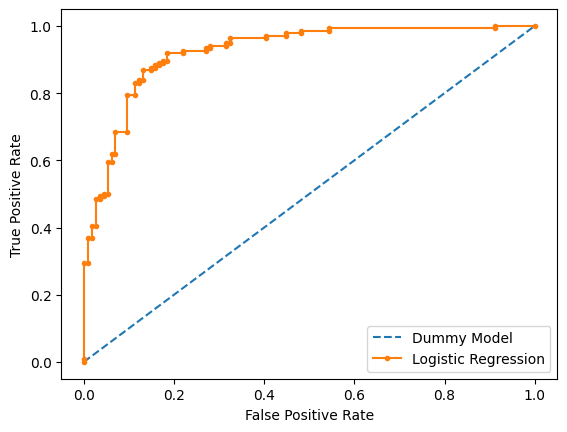

In [21]:
## Plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label = 'Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label = 'Logistic Regression')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.show()